In [1]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
# Glacier ablation over 2000-2016 (Miles et al. 2021, Supp. Tab. 4)
TotAbl_BV = {'INDUSMOD' : 17.7} # Gt/a
ImAbl_BV = {'INDUSMOD' : 6.2} # Gt/a
TotAblUnc_BV = {'INDUSMOD' : 3.64} # Gt/a
# Basin area in sq km
BasinArea_BV = {'INDUSMOD': 831131}
# Mean annual precip from WorldClim
TotPrec_mm_BV = {'INDUSMOD' : 438} # mm/a

In [3]:
# Fill the above dictionnaries to repeat the analysis with BRAHMAPUTRA or GANGES
BV='INDUSMOD' # modified Indus basin (Khan et al)

In [4]:
# Convert to mm
BasinArea = BasinArea_BV[BV]
TotAbl = TotAbl_BV[BV]
ImAbl = ImAbl_BV[BV]
TotAbl_mm = 1e6*TotAbl/BasinArea
ImAbl_mm = 1e6*ImAbl/BasinArea
TotAblUnc_mm = 1e6*TotAblUnc_BV[BV]/BasinArea
TotPrec_mm = TotPrec_mm_BV[BV]

In [5]:
# Function to read tables created by hmasr-mosaic.sh
def readTable(f):
    df = pd.read_csv(f,sep=' ', header=0, index_col=0)
    df = df.rename(columns=int, index=int)
    df.index.name = 'Day since Oct 01'
    df.columns.name = 'Water Year'
    #df.index = pd.to_datetime(df.index, unit='D', origin=pd.Timestamp('2000-09-30'))
    return df

In [6]:
# Load data
snowmelt_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SNOWMELT_'+BV+'.csv')
snowmelt_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SNOWMELT_'+BV+'.csv')
sublim_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SUBLIM_'+BV+'.csv')
sublim_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SUBLIM_'+BV+'.csv')

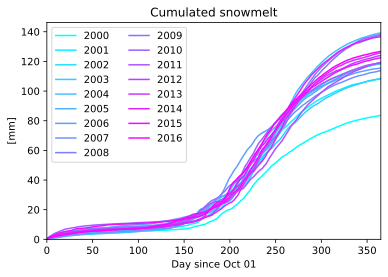

In [7]:
# Plot cumulated snowmelt
#fmt_m = mdates.MonthLocator(interval=1)
ax = snowmelt_mm.plot(colormap='cool')
t0,tf = 0,365
ax.set_xlim(left=t0, right=tf)
ax.set(ylabel='[mm]', title='Cumulated snowmelt')
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2);

In [8]:
# annual (end of water year) snowmelt 
annual_snowmelt_mm = snowmelt_mm.max()
print('mean',annual_snowmelt_mm.mean(),'mm')
print('std',annual_snowmelt_mm.std(),'mm')
print('mean',annual_snowmelt_mm.mean()*1e-3*BasinArea*1e6/1e9,'Gt')
print('std',annual_snowmelt_mm.std()*1e-3*BasinArea*1e6/1e9,'Gt')

mean 121.0072411764706 mm
std 13.774665616225445 mm
mean 100.57286936624118 Gt
std 11.44855160827907 Gt


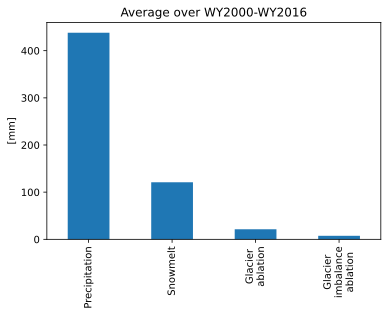

In [9]:
# Compare mean annual snowmelt to glacier ablation
df = pd.DataFrame.from_dict(
    {'Precipitation' : [TotPrec_mm],
     'Snowmelt':[annual_snowmelt_mm.mean()],
     'Glacier\nablation':[TotAbl_mm],
     'Glacier\nimbalance\nablation':[ImAbl_mm]},
    orient='index')
ax = df.plot.bar(legend=None)
ax.set(ylabel='[mm]', title='Average over WY2000-WY2016');

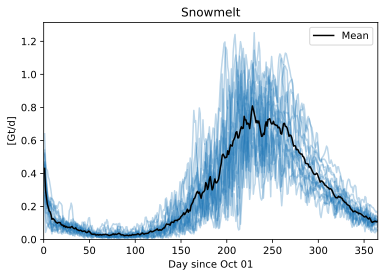

In [10]:
# from m3/d to Gt/d 
snowmelt_Gtd = snowmelt_m3.applymap(lambda x: x*1e-9)
ax = snowmelt_Gtd.plot(color='tab:blue', alpha=0.3)
h = ax.plot(snowmelt_Gtd.mean(axis=1), color='black')
ax.legend(h,('Mean',))
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.set(ylabel='[Gt/d]', title='Snowmelt');

In [11]:
# compute average date of peak snowmelt 
print(pd.to_datetime(snowmelt_Gtd.idxmax().mean(), unit='D', origin=pd.Timestamp('2000-09-30')))
print('std', snowmelt_Gtd.idxmax().std(), 'days')

2001-05-14 11:17:38.823504
std 20.27966237101478 days


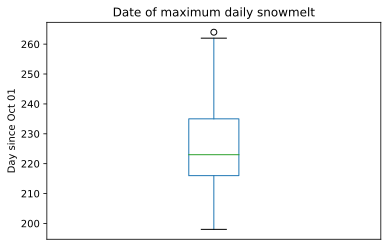

In [12]:
ax = snowmelt_Gtd.idxmax().plot.box(xticks=[0])
ax.set(ylabel='Day since Oct 01', title='Date of maximum daily snowmelt');

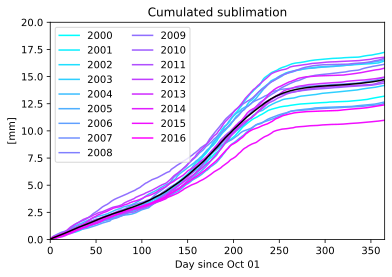

In [13]:
ax = sublim_mm.plot(colormap='cool')
ax.set(ylabel='[mm]', title='Cumulated sublimation')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0, top=20)
h = ax.plot(sublim_mm.mean(axis=1), color='k')
ax.legend(loc='upper left',ncol=2);

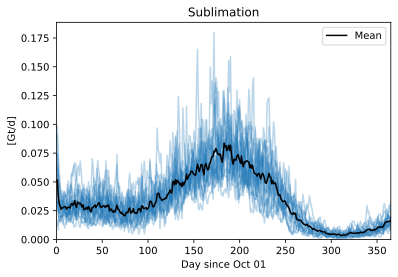

In [14]:
# from m3/d to Gt/d 
sublim_Gtd = sublim_m3.applymap(lambda x: x*1e-9)
ax = sublim_Gtd.plot(color='tab:blue', alpha=0.3, legend=None)
h = ax.plot(sublim_Gtd.mean(axis=1),color='k')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(h,('Mean',))
ax.set(ylabel='[Gt/d]', title='Sublimation');

In [15]:
# annual (end of water year) sublimation 
annual_sublim_mm = sublim_mm.max()
print('mean',annual_sublim_mm.mean(),'mm')
print('std',annual_sublim_mm.std(),'mm')
print('mean',annual_sublim_mm.mean()*1e-3*BasinArea*1e6/1e9,'Gt')
print('std',annual_sublim_mm.std()*1e-3*BasinArea*1e6/1e9,'Gt')

mean 14.742370588235296 mm
std 1.8533196994733214 mm
mean 12.25284120937059 Gt
std 1.5403514551429613 Gt


In [16]:
# compute average date of peak sublimation 
print(pd.to_datetime(sublim_Gtd.idxmax().mean(), unit='D', origin=pd.Timestamp('2000-09-30')))
print('std', sublim_Gtd.idxmax().std(), 'days')

2001-03-15 22:35:17.647094400
std 45.89726379131344 days


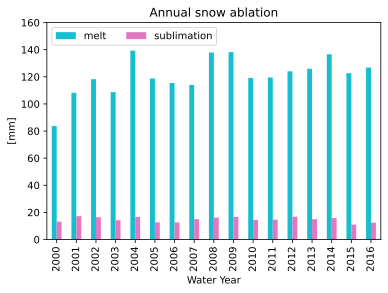

In [17]:
# Compare annual melt and sublimation (max to get the annual total)
sm = pd.concat([snowmelt_mm.max(),sublim_mm.max()], axis=1, 
               keys=['melt', 'sublimation'])
ax = sm.plot.bar(color=['tab:cyan','tab:pink'])
ax.legend(loc='upper left',ncol=2)
ax.set_ylim(top=160)
ax.set(ylabel='[mm]', title='Annual snow ablation');

mean sublimation ratio: 10.928439653239751


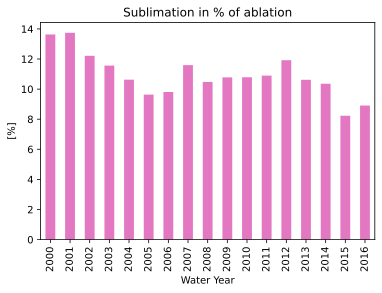

In [18]:
# plot sublimation:ablation ratio
sublimRatio = 100*sublim_mm.max()/(snowmelt_mm.max()+sublim_mm.max())
print('mean sublimation ratio:',sublimRatio.mean())
ax = sublimRatio.plot.bar(color='tab:pink')
ax.set(ylabel='[%]', title='Sublimation in % of ablation');

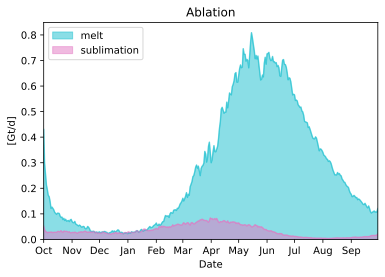

In [19]:
med = pd.concat([snowmelt_Gtd.mean(axis=1), sublim_Gtd.mean(axis=1)], axis=1,
               keys=['melt', 'sublimation'])
med.index = pd.to_datetime(med.index, unit='D', origin=pd.Timestamp('2000-09-30'))
ax = med.plot.area(color=['tab:cyan','tab:pink'], stacked = False)
ax.set(ylabel='[Gt/d]', title='Ablation');

#ax.set_xlim(left=t0, right=tf)

import matplotlib.dates as mdates
fmt = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.minorticks_off()
ax.set(xlabel='Date')
ax.set_ylim(bottom=0);